In [1]:
parent_folder = '/Users/username/Desktop/ML/Recommendations/cambrian/'
data_folder = parent_folder + 'data/'
from hydra import compose, initialize
with initialize(config_path="../../conf"):
    # Compose the configuration
    cfg = compose(config_name="ClustersResetService.yaml")

import os

import xml.etree.ElementTree as ET

tree = ET.parse('../../conf/application.run.xml')
root = tree.getroot()

envs_element = root.find('./configuration/envs')
for variable in envs_element.findall('env'):
    name = variable.get('name')
    value = variable.get('value')
    os.environ[name] = value

/var/folders/d4/cgyr_gnj7nn2wy_hq40gkq8c0000gq/T/ipykernel_5054/1083430745.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../../conf"):


In [2]:
import sys

sys.path.append('/Users/username/Desktop/ML/Recommendations/cambrian/')

from src.clustering.ClustersResetService import ClustersResetService
from src.clustering.ClusterAssignmentService import ClusterAssignmentService

import hydra
import os
from hydra import compose, initialize

/Users/username/anaconda3/envs/recoenv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/username/anaconda3/envs/recoenv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/username/anaconda3/envs/recoenv/lib/python3.11/site-pac

In [3]:
from sql.PostgresDatabaseOperation import PostgresDatabaseOperation

In [4]:
import pandas as pd

In [5]:
with PostgresDatabaseOperation() as cursor:
    sql = 'SELECT article_id, embedding FROM embeddings ORDER BY article_id'
    cursor.execute(sql)
    results = cursor.fetchall()

embeddings_df = pd.DataFrame(results, columns = ['article_id','embedding'])

In [6]:
with PostgresDatabaseOperation() as cursor:
    sql = 'SELECT DISTINCT article_id, cluster_id, parent_name FROM article_to_cluster_mapping acm LEFT JOIN cluster_hierarchy ch ON acm.cluster_id = ch.parent_id'
    cursor.execute(sql)
    results = cursor.fetchall()

clusters_df = pd.DataFrame(results, columns = ['article_id', 'cluster_id', 'parent_name'])

In [7]:
embeddings_df.head(1)

,article_id,embedding
0,651dc3b6a662d76276b7afd9,"[0.0051558976992964745, -0.03998439759016037, ..."


In [10]:
from src.embeddings._utils import get_article_metadata_from_api, parallel_get_article_metadata_from_api

In [9]:
# articles = []
# for article_id in tqdm(list(embeddings_df['article_id'].unique())):
#     a = ArticleService.get_Article(article_id=article_id)
#     articles.append(a)

In [11]:
all_article_ids = list(embeddings_df.article_id.unique())

In [12]:
d = parallel_get_article_metadata_from_api(all_article_ids[:300])

In [14]:
t = {k: d[k]['title'] for k in d.keys()}

In [26]:
combined_df = pd.merge(embeddings_df, clusters_df, how = 'left', on = 'article_id')

combined_df = combined_df.dropna()

titles_list = [(x.article_id, x.title) for x in articles]

titles_df = pd.DataFrame(titles_list, columns = ['article_id', 'title'])

combined_df = pd.merge(titles_df, combined_df, how = 'left', on = 'article_id')

In [28]:
import plotly.express as px

In [30]:
import umap

In [34]:
combined_df.head(3)

,article_id,title,embedding,cluster_id,parent_name
0,6528b2d250af0e25a9122f4e,"Earth Defense Force 6 on PS5, PS4, PC via Stea...","[0.010566741228103638, 0.010105646215379238, -...",203.0,bank_rbi_loan_credit_banks
1,6528b2cf50af0e25a9122f4b,Google to make passwords obsolete? Here’s what...,"[0.02226756513118744, -0.008568921126425266, -...",203.0,bank_rbi_loan_credit_banks
2,6528b2d650af0e25a9122f53,'Messi Meets America' Documentary Series: Here...,"[0.02837894670665264, 0.02687911130487919, -0....",185.0,air_flight_airport_air india_aviation


In [36]:
combined_df = combined_df.rename(columns = {'parent_name': 'cluster_name', 'title': 'article_title'})

In [37]:
df = combined_df

In [44]:
px.colors.qualitative.

Type:        module
String form: <module '_plotly_utils.colors.qualitative' from '/Users/username/anaconda3/envs/recoenv/lib/python3.11/site-packages/_plotly_utils/colors/qualitative.py'>
File:        ~/anaconda3/envs/recoenv/lib/python3.11/site-packages/_plotly_utils/colors/qualitative.py
Docstring:   Qualitative color sequences are appropriate for data that has no natural ordering, such as categories, colors, names, countries etc. The color sequences in this module are mostly meant to be passed in as the `color_discrete_sequence` argument to various functions.

In [13]:
import umap

In [15]:
embeddings = pd.DataFrame(embeddings_df['embedding'].tolist())

In [18]:
import time

In [19]:
# Step 1: UMAP reduction
start_time = time.time()
reducer = umap.UMAP(n_components=3)
embedding_2d = reducer.fit_transform(embeddings)  # This now contains the 2D coordinates of your data
print(f'done in {int(time.time() - start_time)} seconds')

done in 7 seconds


In [7]:
all_article_ids = list(embeddings_df.article_id.unique())

In [9]:
len(all_article_ids)

5280

In [10]:
from src.embeddings._utils import get_article_metadata_from_api

In [15]:
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed

In [16]:
import time

In [20]:
start_time = time.time()
# Assuming you have a list of article IDs
article_ids = all_article_ids  # Replace with your list of article IDs

def download_titles(article_ids):
    """
    Parallel download of titles, returning a dictionary of article_ids and their corresponding titles.
    """
    titles_dict = {}
    with ThreadPoolExecutor() as executor:
        # Start the load operations and mark each future with its article ID
        future_to_article_id = {executor.submit(get_article_metadata_from_api, article_id): article_id for article_id in article_ids}

        for future in as_completed(future_to_article_id):
            article_id = future_to_article_id[future]
            try:
                # If successful, the result is a tuple of article_id and title
                title = future.result()['title']
                titles_dict[article_id] = title  # Combine in a dictionary
            except Exception as e:
                print(f"Error downloading title for article ID {article_id}: {e}")
    return titles_dict

# Using the function to get the titles
article_titles_dict = download_titles(article_ids)

# Output the titles dictionary (or you can process them as needed)
# for article_id, title in article_titles_dict.items():
#     print(f"Article ID: {article_id}, Title: {title}")
print(f'done in {int(time.time() - start_time)} seconds')

done in 33 seconds


In [21]:
len(article_titles_dict)

5280

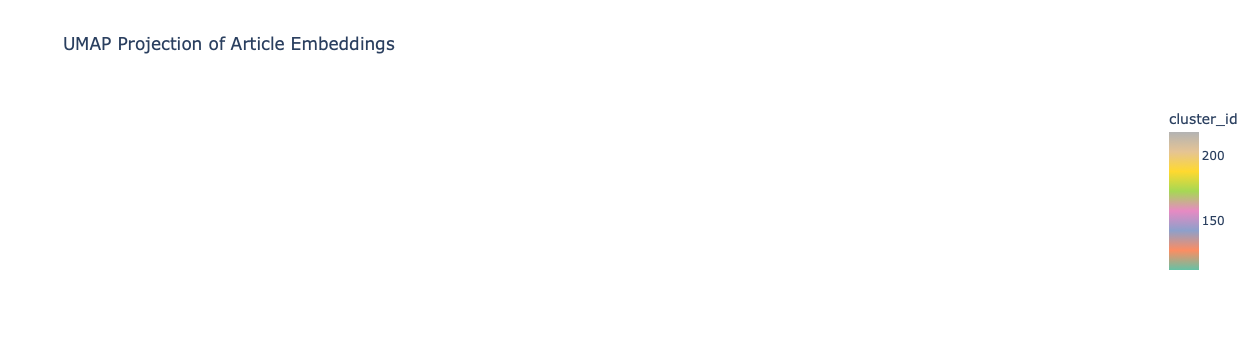

In [43]:
import umap
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame 'df' with columns 'article_id', 'article_title', 'embedding', 'cluster_id', 'cluster_name'

# Extract embeddings; they need to be in the correct shape (list of lists or NumPy array)
# If 'embedding' is a column of lists or arrays, you can convert it directly, otherwise, you need to adjust this step.
embeddings = pd.DataFrame(combined_df['embedding'].tolist())

# Step 1: UMAP reduction
reducer = umap.UMAP(n_components=3)
embedding_2d = reducer.fit_transform(embeddings)  # This now contains the 2D coordinates of your data

# Step 2: Prepare data for plotting
plot_df = pd.DataFrame(embedding_2d, columns=['x', 'y', 'z'])
plot_df['article_title'] = df['article_title']
plot_df['cluster_name'] = df['cluster_name']
plot_df['cluster_id'] = df['cluster_id']  # If you want to use this for color differentiation

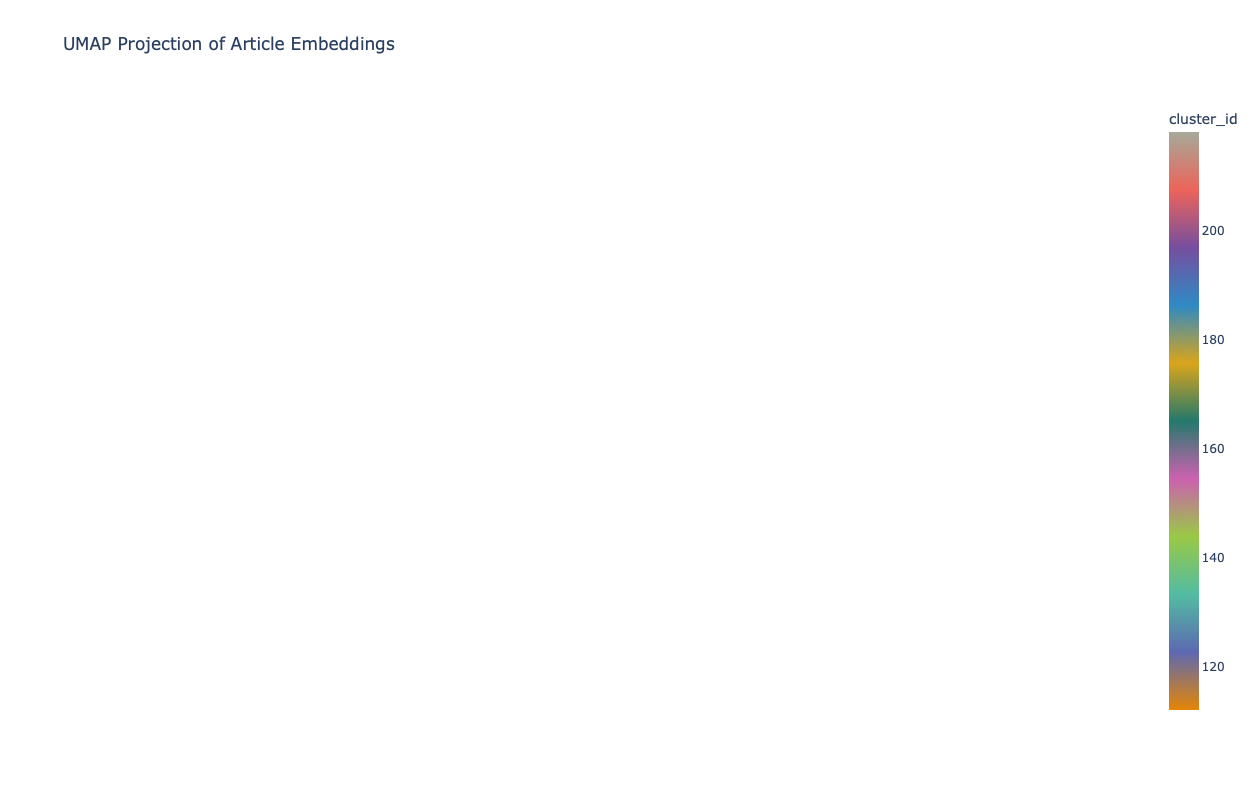

In [46]:
# Step 3: Create the Plotly visualization
fig = px.scatter_3d(
    plot_df,
    x='x',
    y='y',
    z ='z',
    color='cluster_id',  # this will give each cluster a distinct color
    hover_data=['article_title', 'cluster_name'],  # info to display on hover
    labels={'x': 'x', 'y': 'y', 'z': 'z'},  # axes labels
    title='UMAP Projection of Article Embeddings',
    color_continuous_scale=px.colors.qualitative.Vivid,  # you can choose any other palette or even customize it,
    width=800,  # Adjusting dimensions for a more square-like appearance
    height=800
)

fig.update_traces(marker=dict(size=5, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your set of high-dimensional data points (numpy array)
# and 'labels' is an array-like containing the cluster labels.

# Step 1: Reduce dimensionality with UMAP
reducer = umap.UMAP()
embedding_2d = reducer.fit_transform(embeddings)

# Step 2: Plot with matplotlib, color-coded based on 'labels'
plt.figure(figsize=(12, 8))

# Create a scatter plot. Each cluster label will automatically receive a different color.
for cluster_label in np.unique(labels):
    indices = np.where(labels == cluster_label)
    plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1], label=cluster_label)

plt.title('2D UMAP Projection of Embeddings')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()
